<a href="https://colab.research.google.com/github/Memo28/100DayofML/blob/master/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch 
import torch.nn as nn
import torch.optim as optim

from torchvision import utils
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt

Building the model

In [0]:
# The folder in memory where we are going to save the dataset
data_path = 'data/'
full_data_set = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.Compose([
                                                                                                     transforms.ToTensor(),
                                                                                                     transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                                                                                          (0.2470, 0.2435, 0.2616))
                                                                                                    ]))

full_validation_set = datasets.CIFAR10(data_path, train=False, download=True, transform=transforms.Compose([
                                                                                                  transforms.ToTensor(),
                                                                                                  transforms.Normalize((0-4915, 0.4823, 0.4468),
                                                                                                                       (0.2470, 0.2435, 0.2616)),
                                                                                                  ]))
                                       


0it [00:00, ?it/s]

170500096it [00:02, 81999936.32it/s]                               


Extracting data/cifar-10-python.tar.gz to data/
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


deer
frog
frog
bird


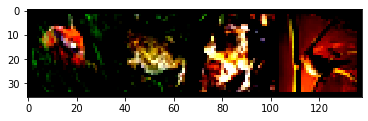

In [0]:
# Dataloader to load the data in bach of 4 images each one
size = 4
dataloader = torch.utils.data.DataLoader(full_data_set, batch_size=size, shuffle=True, num_workers=2)

data_iterator = iter(dataloader)

imgs, labels = data_iterator.next()

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display 4 images
plt.imshow(utils.make_grid(imgs).permute(1, 2, 0))

for i in range(size):
  print(classes[labels[i]])

In [0]:
#classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']
class_names = ['dog', 'frog']

label_map = {5: 0, 6: 1}

data_set = [(img, label_map[label]) for img, label in full_data_set if label in [5, 6]]
validation_set = [(img, label_map[label]) for img, label in full_validation_set if label in [5, 6]]

In [0]:
img, label = data_set[50]
img.shape

torch.Size([3, 32, 32])

In [0]:
# Creating a NN 
model = nn.Sequential(
                       # Linear transformation with the size of the tensor as input and an outup of X neurons
                       nn.Linear(3 * 32 * 32, 512),
                       # Activation function
                       nn.Tanh(),
                       # 512 is the output of linear and we want a binary classifier so we set the out as 2
                       nn.Linear(512, 2)
)


In [0]:
# Softmax guarantees that the sum of the probabilities give us 1 

def softmax(x):
  return torch.exp(x)  / torch.exp(x).sum()

x = torch.tensor([ 1.0, 2.0, 3.0])

softmax(x).sum()

tensor(1.)

In [0]:
# Creating a NN 
model = nn.Sequential(
                       # Linear transformation with the size of the tensor as input and an outup of X neurons
                       nn.Linear(3 * 32 * 32, 512),
                       # Activation function
                       nn.Tanh(),
                       # 512 is the output of linear and we want a binary classifier so we set the out as 2
                       nn.Linear(512, 2),
                       nn.Softmax(dim=1)
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'dog'

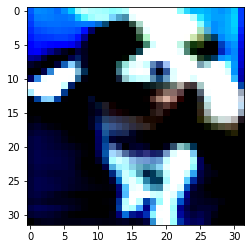

In [0]:
img, label = data_set[12]
plt.imshow(img.permute(1, 2, 0))
class_names[label]

In [0]:
out = model(img.view(-1).unsqueeze(0))
out

tensor([[0.5671, 0.4329]], grad_fn=<SoftmaxBackward>)

In [0]:
_, index = torch.max(out, dim=1)
print(class_names[label], class_names[index])

dog dog


In [0]:
# Getting better 
model = nn.Sequential(
                       # Linear transformation with the size of the tensor as input and an outup of X neurons
                       nn.Linear(3 * 32 * 32, 512),
                       # Activation function
                       nn.Tanh(),
                       # 512 is the output of linear and we want a binary classifier so we set the out as 2
                       nn.Linear(512, 2),
                       nn.LogSoftmax(dim=1)
)
# Adding a loss function
loss_function = nn.NLLLoss()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dog frog


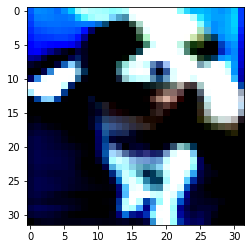

In [0]:
img, label = data_set[12]
plt.imshow(img.permute(1, 2, 0))
class_names[label]

out = model(img.view(-1).unsqueeze(0))
out

_, index = torch.max(out, dim=1)
print(class_names[label], class_names[index])

In [0]:
# Training the model

# Iteration number
n_ephocs = 5

# Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training the model
for ephoc in range(n_ephocs):
  for img, label in data_set:
    out = model(img.view(-1).unsqueeze(0))
    loss = loss_function(out, torch.tensor([label]))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print((ephoc, float(loss)))

(0, 4.030249118804932)
(1, 2.577427387237549)
(2, 6.378727436065674)
(3, 0.015292301774024963)
(4, 0.04210127517580986)


In [0]:
# Adding a train loader to the training elements
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

# NN
# Getting better 
model = nn.Sequential(
                       # Linear transformation with the size of the tensor as input and an outup of X neurons
                       nn.Linear(3 * 32 * 32, 512),
                       # Activation function
                       nn.Tanh(),
                       # 512 is the output of linear and we want a binary classifier so we set the out as 2
                       nn.Linear(512, 2),
                       nn.LogSoftmax(dim=1)
)

# Adding a loss function
loss_function = nn.NLLLoss()

# Iteration number
n_ephocs = 100

# Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training the model this time we are going to iterate over the train loader
for ephoc in range(n_ephocs):
  for img, label in train_loader:
    out = model(img.view(img.shape[0], -1))
    loss = loss_function(out, label)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


  print((ephoc, float(loss)))

(0, 0.49516233801841736)
(1, 0.5882179141044617)
(2, 0.5969717502593994)
(3, 0.5217126607894897)
(4, 0.8990272283554077)
(5, 0.37610924243927)
(6, 0.4765806198120117)
(7, 0.4631458520889282)
(8, 0.2990432381629944)
(9, 0.31106922030448914)
(10, 0.3275088667869568)
(11, 0.3856416344642639)
(12, 0.4539105296134949)
(13, 0.6107398271560669)
(14, 0.3375813663005829)
(15, 0.2420809268951416)
(16, 0.2843931019306183)
(17, 0.23814339935779572)
(18, 0.5712463855743408)
(19, 0.31766819953918457)
(20, 0.4835413098335266)
(21, 0.14750850200653076)
(22, 0.34191229939460754)
(23, 0.08504994213581085)
(24, 0.5425404906272888)
(25, 0.14932820200920105)
(26, 0.19181294739246368)
(27, 0.09313404560089111)
(28, 0.18451285362243652)
(29, 0.22396987676620483)
(30, 0.049620967358350754)
(31, 0.27660489082336426)
(32, 0.14688967168331146)
(33, 0.1351626068353653)
(34, 0.6789872646331787)
(35, 0.11179324239492416)
(36, 0.12266849726438522)
(37, 0.14140552282333374)
(38, 0.0722593143582344)
(39, 0.03322658687

In [0]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=True)

correct = 0
total = 0

with torch.no_grad():
  for imgs, labels in val_loader:
    outputs = model(imgs.view(imgs.shape[0], -1))
    _, predict = torch.max(outputs, dim=1)
    total += labels.shape[0]

    correct += int((predict == labels).sum())

  
print((correct/total))

0.5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dog dog


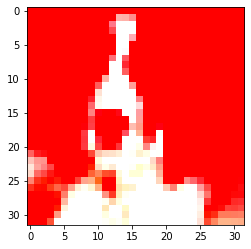

In [0]:
img, label = validation_set[50]
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)
out
print(class_names[label], class_names[index])
plt.imshow(img.permute(1,2,0))
plt.show()

In [0]:
# Improving the model

train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
    nn.Linear(3072, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 128),
    nn.Tanh(),
    nn.Linear(128, 2)
)

loss_function = nn.CrossEntropyLoss()

optimizer= optim.SGD(model.parameters(), lr=0.01)

n_ephocs = 100

for epoch in range(n_ephocs):
  for img, label in train_loader:
    out = model(img.view(img.shape[0], -1))
    loss = loss_function(out, label)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(epoch, float(loss))



0 0.5808447003364563
1 0.5208277702331543
2 0.5206254720687866
3 0.4690283536911011
4 0.43881750106811523
5 0.35437658429145813
6 0.5975275635719299
7 0.2882899045944214
8 0.7217485308647156
9 0.6433804631233215
10 0.6879782676696777
11 0.4682850241661072
12 0.6227649450302124
13 0.3064420819282532
14 0.7316712737083435
15 0.1925787329673767
16 0.2509649395942688
17 0.36864611506462097
18 0.2576729357242584
19 0.3582551181316376
20 0.23072507977485657
21 0.18456067144870758
22 0.5913232564926147
23 0.3554168939590454
24 0.31385213136672974
25 0.34566590189933777
26 0.35317686200141907
27 0.15715382993221283
28 0.1608210653066635
29 0.27303504943847656
30 0.17774339020252228
31 0.5654855370521545
32 0.09883332252502441
33 0.20335158705711365
34 0.12832318246364594
35 0.16778606176376343
36 0.33221524953842163
37 0.12158187478780746
38 0.3510112464427948
39 0.041200097650289536
40 0.1555609256029129
41 0.06476385146379471
42 0.05234112590551376
43 0.05177104100584984
44 0.018720056861639

In [0]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=True)

correct = 0
total = 0

with torch.no_grad():
  for imgs, labels in val_loader:
    outputs = model(imgs.view(imgs.shape[0], -1))
    _, predict = torch.max(outputs, dim=1)
    total += labels.shape[0]

    correct += int((predict == labels).sum())

  
print((correct/total))

0.5


In [0]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

correct = 0
total = 0

with torch.no_grad():
  for imgs, labels in train_loader:
    outputs = model(imgs.view(imgs.shape[0], -1))
    _, predict = torch.max(outputs, dim=1)
    total += labels.shape[0]

    correct += int((predict == labels).sum())

  
print((correct/total))

1.0


In [0]:
sum([p.numel() for p in model.parameters() if p.requires_grad == True])

3737474

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


frog


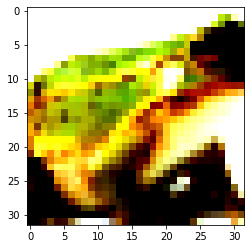

In [0]:
image = request.urlretrieve('https://s3-us-west-2.amazonaws.com/melingoimages/Images/38185.jpg')

img = Image.open(image[0])

preprocess = transforms.Compose([
                                 transforms.Resize(48),
                                 transforms.CenterCrop(32),
                                 transforms.ToTensor(),
                                 transforms.Normalize(
                                     mean=[0.4915, 0.4823, 0.4468],
                                     std=[0.2478, 0.2435, 0.2616]
                                 )])

img_t = preprocess(img)
out = model(img_t.view(-1).unsqueeze(0))
_, index= torch.max(out, dim=1)
print(class_names[index])
plt.imshow(img_t.permute(1, 2, 0))